In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("iris.data", header=None)

print(f"Jumlah Setosa: {df[df.iloc[:, 4] == 'Iris-setosa'].shape[0]}")
print(f"Jumlah Versicolor: {df[df.iloc[:, 4] == 'Iris-versicolor'].shape[0]}")
print(f"Jumlah Virginica: {df[df.iloc[:, 4] == 'Iris-virginica'].shape[0]}")

# df = df[df[4].isin(["Iris-setosa", "Iris-versicolor"])]
df[4] = df[4].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

X = df.iloc[:, [0, 1]].values
y = df.iloc[:, -1].values

if df.empty:
        print("Error: DataFrame kosong")
else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Jumlah Setosa: 50
Jumlah Versicolor: 50
Jumlah Virginica: 50


In [ ]:
class MultiClassPerceptron:
    def __init__(self, n_classes, learning_rate=0.01, epochs=100):
        self.n_classes = n_classes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        self.weights = np.zeros((self.n_classes, X.shape[1]))  # Bobot untuk tiap kelas
        self.bias = np.zeros(self.n_classes)

        # w = w + learning_rate * (y - pred(x)) * x
        # b = b + learning_rate * (y - pred(x))

        for _ in range(self.epochs):
            for i in range(len(X)):
                for cls in range(self.n_classes):
                    target = 1 if y[i] == cls else 0  # One-vs-Rest
                    update = self.learning_rate * (target - self.predict_class(X[i], cls))
                    self.weights[cls] += update * X[i]
                    self.bias[cls] += update

    def predict_class(self, X, cls):
        return np.where(np.dot(X, self.weights[cls]) + self.bias[cls] >= 0, 1, 0)

    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.bias  # Skor dari tiap perceptron
        return np.argmax(scores, axis=1)

In [ ]:
perceptron = MultiClassPerceptron(n_classes=3)
perceptron.train(X_train, y_train)

# prediksi data
y_pred = perceptron.predict(X_test)

# Simpan hasil dalam CSV dan NPZ
pd.DataFrame(X_test).to_csv("Percobaan3_622023018.CSV", index=False)
np.savez("Percobaan3_622023018.NPZ", X_test=X_test, y_test=y_test, y_pred=y_pred)

print("Model selesai dilatih dan data hasil disimpan!")

Model selesai dilatih dan data hasil disimpan!


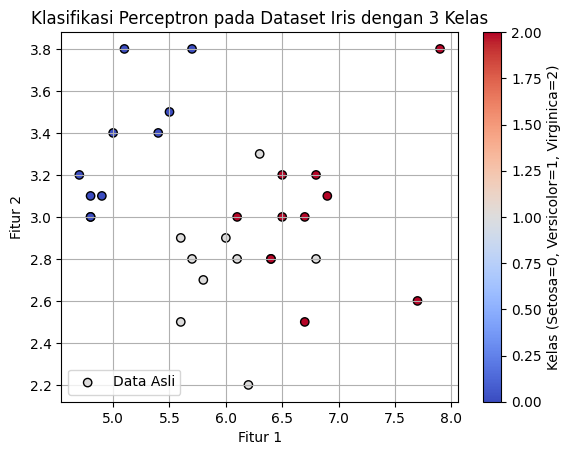

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap="coolwarm", label="Data Asli")
plt.colorbar(label="Kelas (Setosa=0, Versicolor=1, Virginica=2)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Klasifikasi Perceptron pada Dataset Iris dengan 3 Kelas")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# min-max scaler untuk normalisasi data
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

In [ ]:
# normalisasi data
X_train_final = X_train_scaled  # Pakai Min-Max Scaling
X_test_final = X_test_scaled

# inisialisasi dan latih model
perceptron = MultiClassPerceptron(n_classes=3)
perceptron.train(X_train_final, y_train)

# prediksi data uji
y_pred = perceptron.predict(X_test_final)

# simpan hasil dalam CSV dan NPZ
pd.DataFrame(X_test_final).to_csv("Percobaan3_622023018.CSV", index=False)
np.savez("Percobaan3_622023018_Normalized.NPZ", X_test=X_test_final, y_test=y_test, y_pred=y_pred)

print("Model selesai dilatih dan data hasil disimpan!")

Model selesai dilatih dan data hasil disimpan!


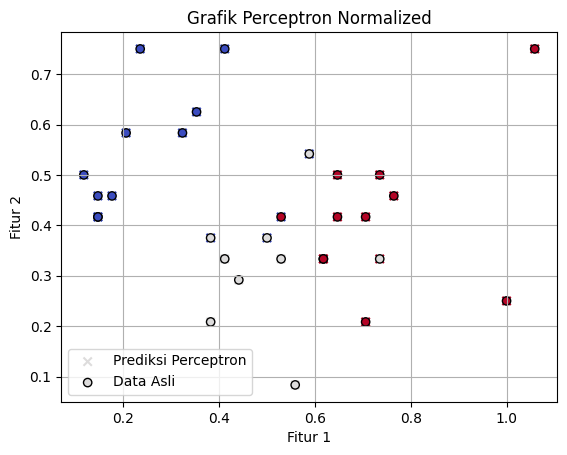

In [ ]:
plt.scatter(X_test_final[:, 0], X_test_final[:, 1], c=y_pred, marker="x", cmap="coolwarm", label="Prediksi Perceptron")
plt.scatter(X_test_final[:, 0], X_test_final[:, 1], c=y_test, edgecolors="k", cmap="coolwarm", label="Data Asli")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Grafik Perceptron Normalized")
plt.grid(True)
plt.legend()
plt.show()

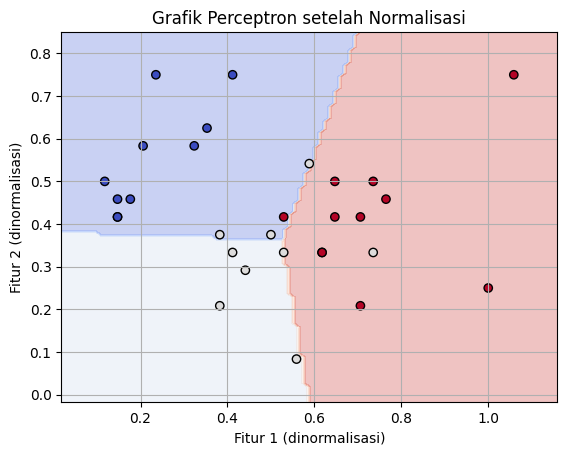

In [ ]:
def plot_decision_boundary(model, X, y):
    # Tentukan batas sumbu x dan y dari data
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Buat mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Hitung prediksi untuk setiap titik di grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

    # Plot data asli dengan label
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="coolwarm")
    plt.xlabel("Fitur 1 (dinormalisasi)")
    plt.ylabel("Fitur 2 (dinormalisasi)")
    plt.title("Grafik Perceptron setelah Normalisasi")
    plt.grid(True)
    plt.show()

# Plot grafik setelah
plot_decision_boundary(perceptron, X_test_final, y_test)